# **Import of the Data files and basic Libraries**

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

# other imports will be made when needed later in the code

In [41]:
bank = pd.read_csv('Data/bank.csv', sep=';')
bank_full = pd.read_csv('Data/bank-full.csv', sep=';')

bank_add = pd.read_csv('Data/bank-additional.csv', sep=';')
bank_add_full = pd.read_csv('Data/bank-additional-full.csv', sep=';')

# **Inspecting the Datasets**

In [42]:
# In the code below we examine which dataset we will use for the study

In [43]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [44]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [46]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [47]:
print('The shape of bank is         : ', bank.shape)
print('The shape of bank_full is    : ',bank_full.shape)
print('The shape of bank_add is     : ',bank_add.shape)
print('The shape of bank_add_full is: ',bank_add_full.shape)

The shape of bank is         :  (4521, 17)
The shape of bank_full is    :  (45211, 17)
The shape of bank_add is     :  (4119, 21)
The shape of bank_add_full is:  (41188, 21)


In [48]:
# The biggest Dataset is the Bank_full but the one with the most independent variables is Bank_add_full. 
# In order to get the best performing prediction model we decided to choose Bank_add_full as our base dataset for this study

## Check the dataset for Missing Values

In [49]:
bank_add_full.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [50]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
bank_add_full.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [52]:
# As you can also see, there are no missing values.
# therefore the dataset is complete and no further cleaning has to be done

# **Transform the Dataset**

## Change the Classification to a Binary 

In [53]:
clean_bank_add_full = pd.get_dummies(bank_add_full, drop_first=True)
clean_bank_add_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [54]:
clean_bank_add_full.keys()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [55]:
# After inspecting the different variables, we observed that not all "months" & "day_of_week" were not present in the dataset
# We decided this missing values are not relevant for the scope of this research

## Drop duration

In [56]:
# according to the researchers it is usefull to drop duration
clean_bank_add_full = clean_bank_add_full.drop('duration', axis=1)

In [57]:
clean_bank_add_full.keys()

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_

## Definition of X & Y

In [58]:
# We define the x Table and y Table
    #x Table contains all variables (without the outcome)
    #y Table only contains the Outcome 0 or 1 (=Success)
x = clean_bank_add_full.drop('y_yes', axis=1)       # independant features
y = clean_bank_add_full['y_yes']                    # dependent variable

## Split the Dataset into Train (0.7) / Test (0.3)

In [59]:
# As we go with the logistic regression model without tuning parameter we decided to split the data only in train & test.

from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

train_x_val, validation_x, train_y_val, validation_y = train_test_split(train_x,train_y, test_size=(0.2/0.7), random_state=42)

In [60]:
train_x.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39075,29,3,999,1,-3.0,92.713,-33.0,0.709,5023.5,0,...,0,0,0,0,1,0,0,0,0,0
34855,29,4,999,0,-1.8,92.893,-46.2,1.250,5099.1,0,...,1,0,0,0,0,0,0,0,1,0
7107,45,2,999,0,1.1,93.994,-36.4,4.860,5191.0,1,...,1,0,0,0,0,1,0,0,1,0
31614,34,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,0,...,1,0,0,0,0,1,0,0,0,0
34878,32,9,999,0,-1.8,92.893,-46.2,1.250,5099.1,0,...,1,0,0,0,0,0,0,0,1,0


In [61]:
#Quick check if the split is correct:
print("Shape of train_x             : "+str(train_x.shape))
print("Shape of test_x              : "+str(test_x.shape))
print("Shape of train_y             : "+str(train_y.shape))
print("Shape of test_y              : "+str(test_y.shape))
print('')
print("Lenght of Dataset            : ", len(x))
print("Percentage of Train          : ", '{:.2f}'.format(len(train_x)/len(x)*100), '%')
print("Percentage of Test           : ", '{:.2f}'.format(len(test_x)/len(x)*100), '%')


Shape of train_x             : (28831, 52)
Shape of test_x              : (12357, 52)
Shape of train_y             : (28831,)
Shape of test_y              : (12357,)

Lenght of Dataset            :  41188
Percentage of Train          :  70.00 %
Percentage of Test           :  30.00 %


## Linear Regression - OLS

In [62]:
#Start with OLS --> No subset selection, because both regularization methods are to be applied (Lasso is therefore an indirect subset selection)
xcon = sm.add_constant(train_x)
model_1 = sm.OLS(train_y, xcon)
results = model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_yes   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:29:17   Log-Likelihood:                -4206.8
No. Observations:               28831   AIC:                             8518.
Df Residuals:                   28779   BIC:                             8948.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -23.4651      4.000     -5.866      0.000     -31.306     -15.625
age                           -9.685e-05      0.000     -0.470      0.638      -0.001       0.000
campaign                         -0.0023      0.001     -3.776      0.000      -0.004      -0.001
pdays                            -0.0002   3.11e-05     -7.687      0.000      -0.000      -0.000
previous                         -0.0104      0.008     -1.278      0.201      -0.026       0.006
emp.var.rate                     -0.2088      0.016    -13.123      0.000      -0.240      -0.178
cons.price.idx                    0.2571      0.027      9.665      0.000       0.205       0.309
cons.conf.idx                     0.0037      0.001      4.037      0.000       0.002       0.006
euribor3m                         0.0836      0.013      6.207      0.000       0.057       0.110
nr.employed                   -7.382e-05      0.000     -0.230      0.818      -0.001       0.001
job_blue-collar                  -0.0083      0.006     -1.342      0.180      -0.020       0.004
job_entrepreneur                 -0.0071      0.010     -0.734      0.463      -0.026       0.012
job_housemaid                    -0.0158      0.011     -1.404      0.160      -0.038       0.006
job_management                   -0.0073      0.007     -1.009      0.313      -0.021       0.007
job_retired                       0.0189      0.010      1.863      0.063      -0.001       0.039
job_self-employed                -0.0116      0.009     -1.226      0.220      -0.030       0.007
job_services                     -0.0081      0.007     -1.223      0.221      -0.021       0.005
job_student                       0.0210      0.012      1.705      0.088      -0.003       0.045
job_technician                    0.0019      0.006      0.320      0.749      -0.010       0.013
job_unemployed                    0.0004      0.011      0.039      0.969      -0.022       0.022
job_unknown                      -0.0291      0.019     -1.535      0.125      -0.066       0.008
marital_married                   0.0031      0.005      0.563      0.574      -0.008       0.014
marital_single                    0.0036      0.006      0.579      0.563      -0.009       0.016
marital_unknown                   0.0213      0.039      0.542      0.588      -0.056       0.098
education_basic.6y                0.0046      0.009      0.518      0.605      -0.013       0.022
education_basic.9y               -0.0048      0.007     -0.681      0.496      -0.019       0.009
education_high.school            -0.0015      0.007     -0.209      0.835      -0.016       0.013
education_illiterate              0.1165      0.085      1.375      0.169      -0.050       0.283
education_professional.course    -0.0019     

In [63]:
# To double check the OLS Regression we also implemented the LinearRegression from Sklearn 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)

# check how good the train model is on the test data (how it works on data which is not in the "data set")
print(reg.score(test_x, test_y))
print(reg.intercept_)
print(reg.coef_)



0.20792169269853256
-23.465123061031804
[-9.68511910e-05 -2.31620535e-03 -2.39278690e-04 -1.03875595e-02
 -2.08835963e-01  2.57083324e-01  3.74767299e-03  8.35742143e-02
 -7.38245078e-05 -8.26501271e-03 -7.09283903e-03 -1.58056182e-02
 -7.28582407e-03  1.89103103e-02 -1.16320946e-02 -8.14253566e-03
  2.10182300e-02  1.89137722e-03  4.43077001e-04 -2.91244857e-02
  3.06695210e-03  3.62698915e-03  2.13046757e-02  4.58715997e-03
 -4.79843109e-03 -1.51996683e-03  1.16486652e-01 -1.85280523e-03
  9.56837628e-03 -2.41239930e-03 -1.10551015e-02 -3.76182480e-02
 -1.71363532e-03 -4.02211386e-03 -1.71363532e-03  4.16204950e-03
 -7.55381136e-02  8.55987535e-02  6.56588684e-02  2.10262346e-02
 -6.72899932e-02  2.48116376e-01 -4.48136815e-02 -5.26543136e-02
  5.75581221e-03  1.88171724e-02 -1.61949158e-02  1.25561483e-02
  5.61533607e-03  1.26801945e-02  4.80749493e-02  1.26592957e-01]


## Linear Regression - Ridge / Lasso

In [64]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

from sklearn import linear_model
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [65]:
#OLS mit Ridge without Change of Lambda
model1 = OLS(train_y, xcon)
result1 = model1.fit_regularized(alpha=1., L1_wt=0) #Ridge
print(result1.params)

[ 2.37912187e-04  2.95729883e-04 -2.69059291e-03 -4.07735385e-04
 -2.21685779e-03 -1.71638062e-02  2.42790688e-02  4.81808251e-03
 -1.90406237e-02 -2.90549251e-04 -3.37873364e-03 -3.08241912e-04
 -3.16547399e-04 -2.26121291e-04  1.75868734e-03 -2.03468405e-04
 -1.22563995e-03  1.40451042e-03  5.28800430e-04  2.31598015e-04
 -1.93742319e-04 -1.91560030e-03  2.64761093e-03  1.28347007e-05
 -4.57626547e-04 -1.97655275e-03 -7.32224985e-04  4.46149621e-05
  4.74688407e-05  3.69798565e-03  2.35216175e-04 -3.88844238e-03
 -4.47779116e-06 -9.84056573e-06 -2.53844822e-04 -9.84056573e-06
  3.10060952e-04 -7.54719278e-03  6.49088232e-05  4.47720819e-04
  5.44734009e-03  2.32680178e-03  3.14607536e-03 -1.42809774e-02
 -1.33199085e-03  1.78080858e-03  7.83134786e-04 -2.41987005e-03
  1.89308754e-03  6.62579387e-04  1.10673677e-03  3.20443085e-03
  5.66210182e-04]


In [66]:
#OLS mit Lasso without Change of Lambda
model2 = OLS(train_y, xcon)
result2 = model1.fit_regularized(alpha=0, L1_wt=1) #lasso
print(result2.params)

const                            0.026040
age                              0.000181
campaign                        -0.003374
pdays                           -0.000059
previous                         0.053028
emp.var.rate                    -0.056345
cons.price.idx                   0.000623
cons.conf.idx                    0.001868
euribor3m                        0.004986
nr.employed                      0.000008
job_blue-collar                 -0.011662
job_entrepreneur                -0.012857
job_housemaid                   -0.013217
job_management                  -0.009781
job_retired                      0.033346
job_self-employed               -0.014734
job_services                    -0.009150
job_student                      0.048934
job_technician                  -0.000255
job_unemployed                   0.004448
job_unknown                     -0.022776
marital_married                  0.005559
marital_single                   0.007416
marital_unknown                  0

In [67]:
#Validation for Lambda
lambdas = np.arange(1, 10, 0.01) #First between 1-10
rr = RidgeCV(alphas=lambdas, fit_intercept=True, store_cv_values=True)
rr.fit(train_x_val, train_y_val)
betaRidge = np.append(rr.intercept_,rr.coef_)
betaRidge
yhat = np.dot(sm.add_constant(validation_x),betaRidge)
yhat1 = rr.predict(validation_x)
validationMSE = np.mean((yhat-validation_y)**2)

print("Optimal tuning parameter using cross validation: ", rr.alpha_)
print("Ridge Estimates using optimal tuning parameter : ", betaRidge)
print("Validation MSE: ", validationMSE)

Optimal tuning parameter using cross validation:  7.390000000000006
Ridge Estimates using optimal tuning parameter :  [-2.27079959e+01 -6.00049025e-05 -2.26483679e-03 -3.08062279e-04
 -1.97382195e-02 -1.97815544e-01  2.46248089e-01  4.14793537e-03
  7.29209476e-02  1.38182327e-06 -4.82104141e-03 -1.80501411e-04
 -1.51786038e-02 -6.08908986e-03  3.22795531e-02 -1.39076875e-02
 -7.81792156e-03  3.00751552e-02  5.82461158e-04  1.25084913e-02
 -2.24030379e-02  9.70866209e-04 -1.11809857e-03  2.10596383e-02
  8.91560434e-04 -8.54959309e-03 -1.24029355e-03  6.29203133e-02
  2.56001159e-03  1.09433231e-02 -9.84933603e-03 -8.69500167e-03
 -6.83845595e-03 -5.10086343e-03 -3.11510688e-03 -5.10086343e-03
  4.92103342e-03 -6.40223554e-02  8.69205990e-02  8.96159022e-02
  2.46972938e-02 -7.10041292e-02  2.41237270e-01 -4.84591407e-02
 -4.62739033e-02 -1.08514134e-02  1.69999128e-02 -1.24176700e-02
  1.29727713e-02  4.10287553e-03  1.79867258e-02  3.02779242e-02
  7.45923345e-02]
Validation MSE:  0.

In [68]:
#Ridge with Change of Lambda
ridge_reg = Ridge(alpha=rr.alpha_, fit_intercept=True, solver='sparse_cg')

ridge_reg.fit(test_x, test_y)
print("Ridge Estimates from package: ",np.append(ridge_reg.intercept_,ridge_reg.coef_))


Ridge Estimates from package:  [ 8.71878681e+00  1.09299890e-03 -8.25058682e-04 -3.17985792e-04
 -1.56905899e-02  1.07903126e-02  1.75972688e-02  4.45031109e-03
  9.32894434e-03 -1.90004731e-03 -1.82377902e-02 -1.36600604e-03
  8.55321218e-04 -1.13250314e-03  9.51528869e-03  1.57246092e-03
 -5.24016964e-03  6.19716197e-03 -1.36004150e-04 -3.46394550e-04
  7.22253901e-04 -1.30437058e-02  1.52104026e-02  3.51834906e-04
 -2.45188790e-03 -9.46187515e-03  3.41167507e-04  1.39907400e-04
  2.35652590e-03  7.05447650e-03  5.27485882e-03 -1.56259059e-02
 -1.54979179e-05 -1.23308509e-03  1.37423371e-03 -1.23308509e-03
 -6.78029213e-03 -2.68108025e-02  6.93152600e-03  2.54487710e-03
  3.09429350e-02  1.47874303e-02  1.06686279e-02 -6.78295335e-02
 -1.75070404e-03  1.21681787e-03 -2.24624641e-04 -1.12802248e-02
 -8.26153229e-05  3.42755937e-03  7.39869340e-03  1.44011517e-02
  2.56950476e-03]


In [69]:
lasso_reg = linear_model.Lasso(alpha=rr.alpha_, fit_intercept=True)

lasso_reg.fit(test_x, test_y)
print("Lasso Estimates from package:", np.append(lasso_reg.intercept_,lasso_reg.coef_))

#because IOO a Linear Ridge Regression doesnt make any sense (higher than one and lower than 0 = non-sensical Predicitions), we will use for further analysis a Logistic Regression 

Lasso Estimates from package: [ 4.28553822e-01  0.00000000e+00 -0.00000000e+00 -3.29064332e-04
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


### Definition of Array of optimal Threshold of the confusion Matrix & optimal C-Value (Inverse of the regulazation Strentgh)

In [155]:
thresh_p_arr = np.arange(0.3, 0.8, 0.05)
thresh_p_arr

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])

In [158]:
c_val_arr = np.arange(1, 100, 5)
c_val_arr

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [159]:
#Loop Example:
count_combination = 0
for i in range(len(thresh_p_arr)):
    for x in range(len(c_val_arr)):
        print(thresh_p_arr[i])
        print(c_val_arr[x])
        count_combination +=1
print(count_combination)

0.3
1
0.3
6
0.3
11
0.3
16
0.3
21
0.3
26
0.3
31
0.3
36
0.3
41
0.3
46
0.3
51
0.3
56
0.3
61
0.3
66
0.3
71
0.3
76
0.3
81
0.3
86
0.3
91
0.3
96
0.35
1
0.35
6
0.35
11
0.35
16
0.35
21
0.35
26
0.35
31
0.35
36
0.35
41
0.35
46
0.35
51
0.35
56
0.35
61
0.35
66
0.35
71
0.35
76
0.35
81
0.35
86
0.35
91
0.35
96
0.39999999999999997
1
0.39999999999999997
6
0.39999999999999997
11
0.39999999999999997
16
0.39999999999999997
21
0.39999999999999997
26
0.39999999999999997
31
0.39999999999999997
36
0.39999999999999997
41
0.39999999999999997
46
0.39999999999999997
51
0.39999999999999997
56
0.39999999999999997
61
0.39999999999999997
66
0.39999999999999997
71
0.39999999999999997
76
0.39999999999999997
81
0.39999999999999997
86
0.39999999999999997
91
0.39999999999999997
96
0.44999999999999996
1
0.44999999999999996
6
0.44999999999999996
11
0.44999999999999996
16
0.44999999999999996
21
0.44999999999999996
26
0.44999999999999996
31
0.44999999999999996
36
0.44999999999999996
41
0.44999999999999996
46
0.4499999999999999

We Calculate here 200 Combinations of Thresholds & C Values

## Logit

In [189]:
#Logit without Penalty
c_val = 9999999999
result_logit1 = pd.DataFrame()
for i in range(len(thresh_p_arr)):
    model= LogisticRegression(C = c_val,  solver='liblinear')      # Default penalty = L2 = ridge (squared error / close to zero)
    model.fit(train_x, train_y)

    n = len(test_x)
    prob = model.predict_proba(test_x)
    pred = model.predict(test_x)
    y_pred = 1*(prob[:,1] > thresh_p_arr[i])
    cm = confusion_matrix(test_y, y_pred)
    frac_correct = (cm[0,0]+cm[1,1])/n

    mse = mean_squared_error(test_y, y_pred)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])

    temp_results = []
    model = 'Logit'
    regularization = 'None'
    p_value = thresh_p_arr[i]
    c_value = c_val
    frac_correct
    P1_A1 = cm[1,1]
    P0_A0 = cm[0,0]
    P1_A0 = cm[0,1]
    P0_A1 = cm[1,0]

    temp_results.append((model, regularization, p_value, c_value, frac_correct, sensitivity1,specificity1,P1_A1,P0_A0, P1_A0,P0_A1, mse))
    temp_results = pd.DataFrame(temp_results)
    result_logit1 = result_logit1.append(temp_results)

In [190]:
result_logit1

,0,1,2,3,4,5,6,7,8,9,10,11
0,Logit,None,0.30,9999999999,0.882253,0.942469,0.406767,565,10337,631,824,0.117747
0,Logit,None,0.35,9999999999,0.889860,0.957330,0.357091,496,10500,468,893,0.110140
0,Logit,None,0.40,9999999999,0.894635,0.970915,0.292297,406,10649,319,983,0.105365
0,Logit,None,0.45,9999999999,0.898762,0.980671,0.251980,350,10756,212,1039,0.101238
0,Logit,None,0.50,9999999999,0.900218,0.986506,0.218862,304,10820,148,1085,0.099782
0,Logit,None,0.55,9999999999,0.899490,0.989333,0.190065,264,10851,117,1125,0.100510
0,Logit,None,0.60,9999999999,0.898600,0.990974,0.169186,235,10869,99,1154,0.101400
0,Logit,None,0.65,9999999999,0.897953,0.993344,0.144708,201,10895,73,1188,0.102047
0,Logit,None,0.70,9999999999,0.897386,0.995897,0.119510,166,10923,45,1223,0.102614
0,Logit,None,0.75,9999999999,0.894230,0.997994,0.074874,104,10946,22,1285,0.105770


In [194]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# First we check for the logit with L2 (ridge)
count_combination = 0
result_logit_ridge = pd.DataFrame()
for i in range(len(thresh_p_arr)):
    for x in range(len(c_val_arr)):
        model= LogisticRegression(solver='liblinear', C=c_val_arr[x])      # Default penalty = L2 = ridge (squared error / close to zero)
        model.fit(train_x, train_y)

        n = len(test_x)
        prob = model.predict_proba(test_x)
        pred = model.predict(test_x)
        y_pred = 1*(prob[:,1] > thresh_p_arr[i])
        cm = confusion_matrix(test_y, y_pred)
        frac_correct = (cm[0,0]+cm[1,1])/n

        mse = mean_squared_error(test_y, y_pred)
        sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
        specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])

        temp_results = []
        model = 'Logit with Ridge'
        regularization = 'L2'
        p_value = thresh_p_arr[i]
        c_value = c_val_arr[x]
        frac_correct
        P1_A1 = cm[1,1]
        P0_A0 = cm[0,0]
        P1_A0 = cm[0,1]
        P0_A1 = cm[1,0]
        temp_results.append((model, regularization, p_value, c_value, frac_correct, sensitivity1,specificity1,P1_A1,P0_A0, P1_A0,P0_A1, mse))
        temp_results = pd.DataFrame(temp_results)
        result_logit_ridge = result_logit_ridge.append(temp_results)

        count_combination +=1
print(count_combination)

200


In [195]:
result_logit_ridge

,0,1,2,3,4,5,6,7,8,9,10,11
0,Logit with Ridge,L2,0.30,1,0.883143,0.943837,0.403888,561,10352,616,828,0.116857
0,Logit with Ridge,L2,0.30,6,0.882172,0.942469,0.406048,564,10337,631,825,0.117828
0,Logit with Ridge,L2,0.30,11,0.883629,0.942287,0.420446,584,10335,633,805,0.116371
0,Logit with Ridge,L2,0.30,16,0.883871,0.942469,0.421166,585,10337,631,804,0.116129
0,Logit with Ridge,L2,0.30,21,0.882172,0.942469,0.406048,564,10337,631,825,0.117828
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Logit with Ridge,L2,0.75,76,0.894230,0.997994,0.074874,104,10946,22,1285,0.105770
0,Logit with Ridge,L2,0.75,81,0.893016,0.997721,0.066235,92,10943,25,1297,0.106984
0,Logit with Ridge,L2,0.75,86,0.893421,0.998085,0.066955,93,10947,21,1296,0.106579
0,Logit with Ridge,L2,0.75,91,0.894230,0.997994,0.074874,104,10946,22,1285,0.105770


In [198]:
# Second we test logit with L1 (lasso)
result_logit_lasso = pd.DataFrame()
for i in range(len(thresh_p_arr)):
    for x in range(len(c_val_arr)):
        model = LogisticRegression(penalty="l1", solver='saga', C=c_val_arr[x], fit_intercept=True)
        model.fit(train_x, train_y)

        n = len(test_x)
        prob = model.predict_proba(test_x)
        pred = model.predict(test_x)
        y_pred = 1*(prob[:,1] > thresh_p_arr[i])
        cm = confusion_matrix(test_y, y_pred)
        frac_correct = (cm[0,0]+cm[1,1])/n

        mse = mean_squared_error(test_y, y_pred)
        sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
        specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])

        temp_results = []
        model = 'Logit with Lasso'
        regularization = 'L1'
        p_value = thresh_p_arr[i]
        c_value = c_val_arr[x]
        frac_correct
        P1_A1 = cm[1,1]
        P0_A0 = cm[0,0]
        P1_A0 = cm[0,1]
        P0_A1 = cm[1,0]
        temp_results.append((model, regularization, p_value, c_value, frac_correct, sensitivity1,specificity1,P1_A1,P0_A0, P1_A0,P0_A1, mse))
        temp_results = pd.DataFrame(temp_results)
        result_logit_lasso = result_logit_lasso.append(temp_results)

c:\Users\lione\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\lione\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\lione\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\lione\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\lione\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

In [199]:
result_logit_lasso

,0,1,2,3,4,5,6,7,8,9,10,11
0,Logit with Lasso,L1,0.30,1,0.896820,0.983497,0.212383,295,10787,181,1094,0.103180
0,Logit with Lasso,L1,0.30,6,0.896820,0.983497,0.212383,295,10787,181,1094,0.103180
0,Logit with Lasso,L1,0.30,11,0.896820,0.983497,0.212383,295,10787,181,1094,0.103180
0,Logit with Lasso,L1,0.30,16,0.896820,0.983497,0.212383,295,10787,181,1094,0.103180
0,Logit with Lasso,L1,0.30,21,0.896820,0.983497,0.212383,295,10787,181,1094,0.103180
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Logit with Lasso,L1,0.75,76,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406
0,Logit with Lasso,L1,0.75,81,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406
0,Logit with Lasso,L1,0.75,86,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406
0,Logit with Lasso,L1,0.75,91,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406


## Analysis with different P & C

In [200]:
main_results = pd.DataFrame()
main_results = main_results.append(result_logit1)
main_results = main_results.append(result_logit_ridge)
main_results = main_results.append(result_logit_lasso)
main_results.rename(columns= {0:'Model', 1:'Regulation', 2:'Threshold', 3:'C-Value', 4:'frac_correct', 5:'Sensitivity', 6:'Specificity', 7:'P1_A1', 8:'P0_A0', 9:'P1_A0', 10:'P0_A1', 11:'MSE' }, inplace = True)
main_results.to_excel('Main_results.xlsx')
main_results

,Model,Regulation,Threshold,C-Value,frac_correct,Sensitivity,Specificity,P1_A1,P0_A0,P1_A0,P0_A1,MSE
0,Logit,None,0.30,9999999999,0.882253,0.942469,0.406767,565,10337,631,824,0.117747
0,Logit,None,0.35,9999999999,0.889860,0.957330,0.357091,496,10500,468,893,0.110140
0,Logit,None,0.40,9999999999,0.894635,0.970915,0.292297,406,10649,319,983,0.105365
0,Logit,None,0.45,9999999999,0.898762,0.980671,0.251980,350,10756,212,1039,0.101238
0,Logit,None,0.50,9999999999,0.900218,0.986506,0.218862,304,10820,148,1085,0.099782
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Logit with Lasso,L1,0.75,76,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406
0,Logit with Lasso,L1,0.75,81,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406
0,Logit with Lasso,L1,0.75,86,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406
0,Logit with Lasso,L1,0.75,91,0.887594,1.000000,0.000000,0,10968,0,1389,0.112406


## Best Model: Logit with Ridge (L2) with Threshold = 0.5 and C-Value = 11

0.9007849801731812


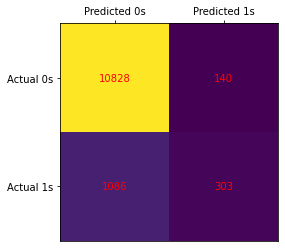

Fraction of correct predictions:  0.9007849801731812
MSE          :  0.09921501982681881
Sensitivity  :  0.987235594456601
Specificity  :  0.21814254859611232


In [197]:
model = LogisticRegression(solver='liblinear', C=11)      # Default penalty = L2 = ridge (squared error / close to zero)
model_best = model.fit(train_x, train_y)
print(model.score(test_x, test_y))
n = len(test_x)

prob = model.predict_proba(test_x)
pred = model.predict(test_x)
y_pred = 1*(prob[:,1] > 0.5)
cm = confusion_matrix(test_y, y_pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
       for j in range(2):
              ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)

mse = mean_squared_error(test_y, y_pred)
print('MSE          : ',mse)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity  : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity  : ', specificity1)

In [187]:
print('Coefficients: ')
print(model_best.coef_)

print('Intercept: ')
print(model_best.intercept_)

Coefficients: 
[[-5.34052905e-04 -5.31211517e-02 -1.78366304e-03 -1.32660551e-01
  -3.67021326e-01  3.59419227e-01  1.12167512e-02  6.31020244e-02
  -6.56304840e-03 -1.01105113e-01 -4.64963476e-02 -9.16131460e-02
  -6.28382490e-02  1.67831898e-01 -7.67463254e-02 -9.29168445e-02
   1.40096491e-01  2.60289367e-02  4.20845700e-03 -5.90435959e-02
   2.53361781e-02  4.41167338e-02  9.89126523e-03  3.87020700e-02
  -6.84290040e-02 -1.82421622e-02  1.37585741e-02 -2.33912592e-02
   1.16752461e-01  2.49790885e-03 -2.28012193e-01 -1.15529332e-03
  -1.11118536e-02 -5.36190690e-02 -1.11118536e-02  3.72625309e-02
  -4.84749148e-01  2.10897085e-02  5.41544608e-02  2.34172208e-01
   1.33245674e-01  5.69463092e-01 -6.53940422e-01 -3.12889122e-01
   1.47352807e-02 -1.34170268e-01 -1.97147116e-01  1.16043449e-01
   6.16868897e-02  1.40593669e-01  3.50171843e-01  9.07842805e-02]]
Intercept: 
[0.00168058]


There are business...